In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('./ml_files/USA_Housing.csv')
df.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


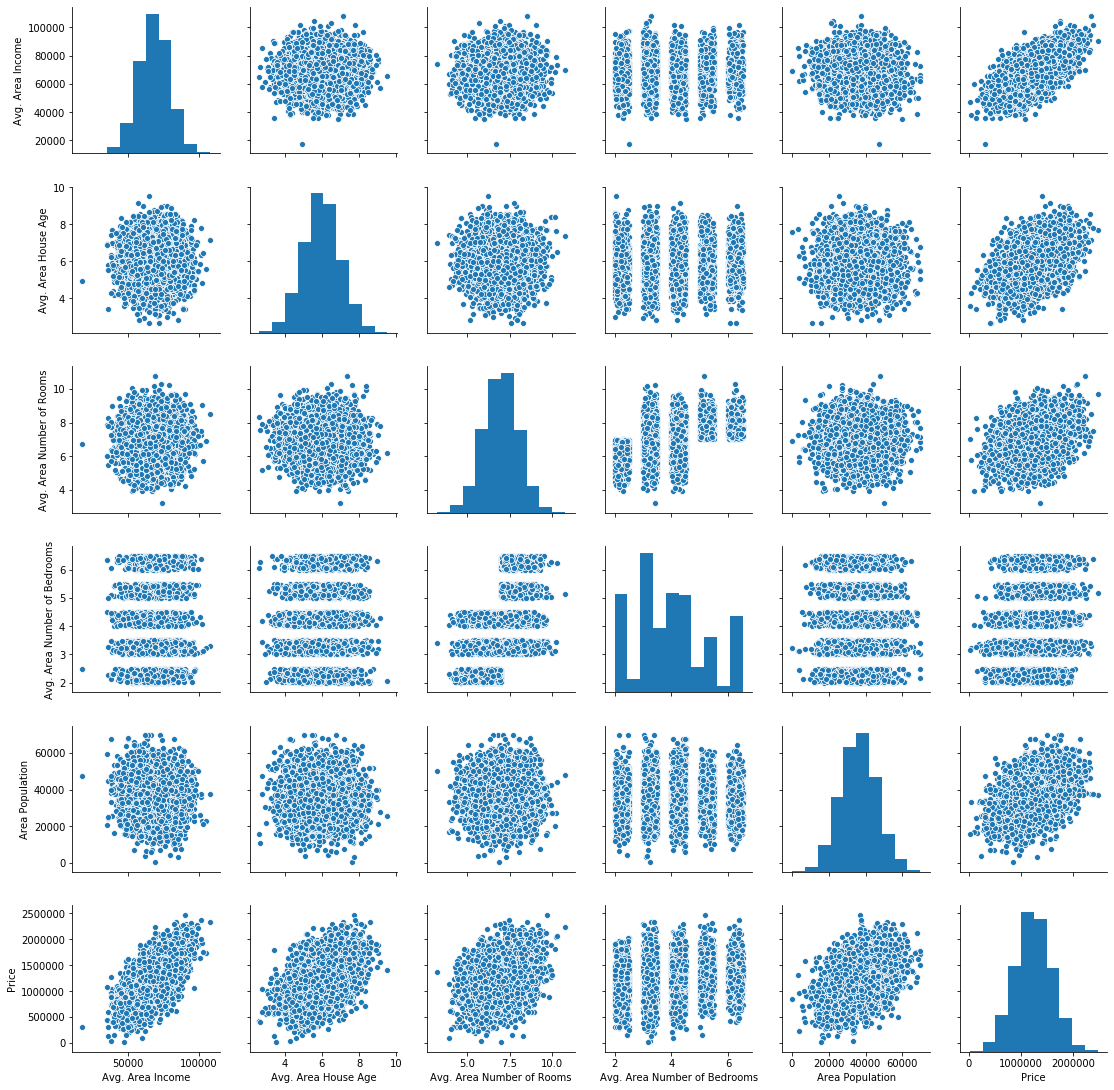

In [13]:
sns.pairplot(df)

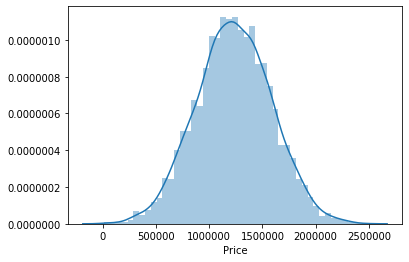

In [14]:
sns.distplot(df.Price)

In [6]:
# Price(Y)를 예측하는 모델 : 지도학습(supervised learning : regression)

In [ ]:
# x, y divide

In [8]:
y = df['Price']
x = df.drop(['Price', 'Address'], axis=1)

In [9]:
y.shape

(5000,)

In [10]:
x.shape

(5000, 5)

In [11]:
# Train, Test split

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=11)

In [16]:
# Agorithm import

In [17]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [ ]:
# Algorithm Train

In [19]:
lr_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# model prediction

In [24]:
predictions = lr_model.predict(x_test)
predictions[:5]

array([1267264.46185469,  650326.56507686, 1572833.56977363,
       1068279.30174547,  573415.21357401])

In [25]:
# model evaluation

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [29]:
print('MSE:', mean_squared_error(y_test, predictions))
print('MAE:', mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

MSE: 9836908785.583002
MAE: 80511.37214841344
RMSE: 99181.19169269445


In [31]:
lr_model.score(x_test, y_test)

0.9200415827209038

In [32]:
lr_model.coef_

array([2.15901693e+01, 1.66514334e+05, 1.22212807e+05, 3.92937432e+02,
       1.52592651e+01])

In [34]:
lr_model.intercept_

-2650444.3360910183

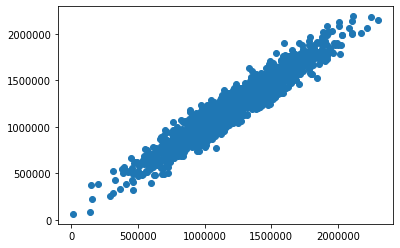

In [35]:
plt.scatter(y_test, predictions)

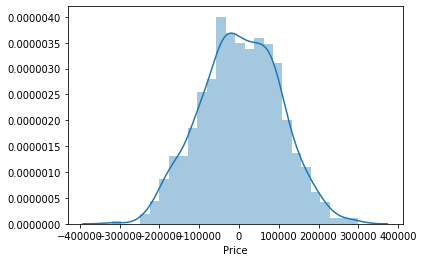

In [36]:
# 잔차의 histogram

sns.distplot(predictions-y_test)